# Assignment 1: Neural Networks and Deep Learning

## Iván Travisany

# 1. Data Cleaning and Preprocessing

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset
data_path = 'Algerian_forest_fires_cleaned.csv'
df = pd.read_csv(data_path)

In [3]:
# Understanding the dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
# Check for nulls or dupes
print(df.isnull().sum())

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [5]:
# Clean up extra spaces in single col
df['Classes'] = df['Classes'].str.strip()

# Split the string by spaces or multiple spaces
df['Classes'] = df['Classes'].str.split()

# Explode it into separate rows for convenience
df = df.explode('Classes').reset_index(drop=True)

In [6]:
# Replace 'fire' with 1 and 'not' with 0 so the nulls can be replaced
df.replace({'fire': 1, 'not': 0}, inplace=True)

# Filling NaN values with mean
df.fillna(df.mean(), inplace=True)

In [7]:
# Replace null values with the column mean
df.fillna(df.mean(), inplace=True)

In [8]:
# Check for duplicate rows
df.drop_duplicates(inplace=True)

In [9]:
# Feature engineering: Check for categorical and numerical features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          349 non-null    int64  
 1   month        349 non-null    int64  
 2   year         349 non-null    int64  
 3   Temperature  349 non-null    int64  
 4   RH           349 non-null    int64  
 5   Ws           349 non-null    int64  
 6   Rain         349 non-null    float64
 7   FFMC         349 non-null    float64
 8   DMC          349 non-null    float64
 9   DC           349 non-null    float64
 10  ISI          349 non-null    float64
 11  BUI          349 non-null    float64
 12  FWI          349 non-null    float64
 13  Classes      349 non-null    int64  
 14  Region       349 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 41.0 KB


### Observations

We also need to check for unique values, in this case, year

In [10]:
# Check for unique values
print(df['year'].unique())

[2012]


In [11]:
# Since it doesn't have other values, we will discard that col
df = df.drop('year', axis=1)

In [12]:
# Split the dataset into features and target
# Assuming FWI is the target variable based on the context
X = df.drop('FWI', axis=1)
y = df['FWI']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# 2. Data Visualization and Observations

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

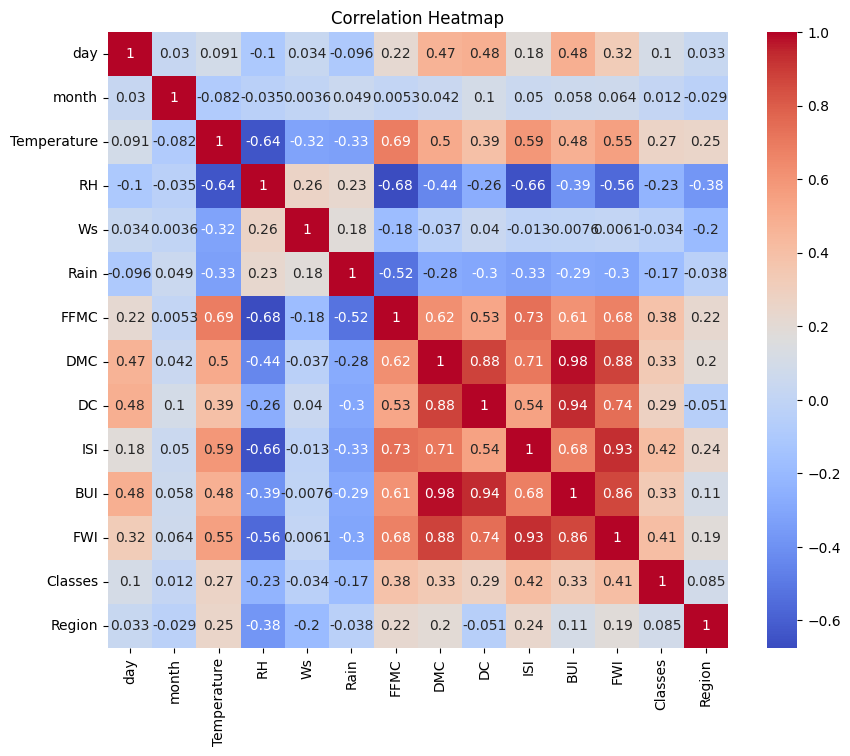

In [15]:
# Correlation heatmap to check the correlation between features and target
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Observations

Correlation heatmap shows which variables are more strongly correlated with FWI:

- ISI
- DMC
- BUI

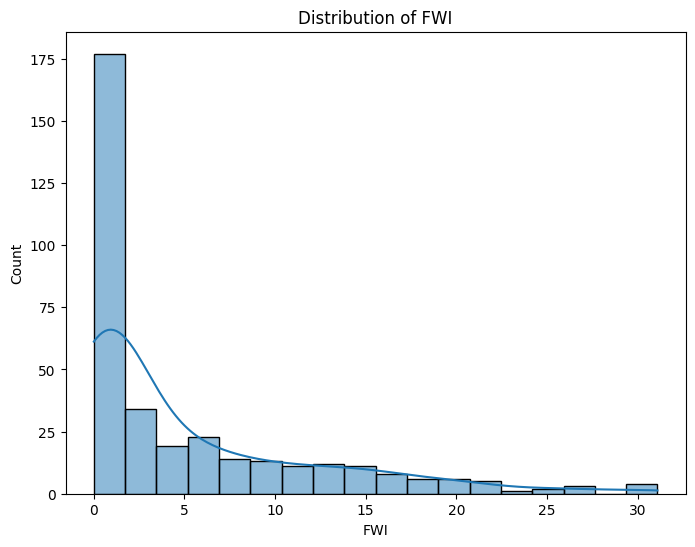

In [16]:
# Visualizing the distribution of the FWI variable
plt.figure(figsize=(8, 6))
sns.histplot(df['FWI'], bins=18, kde=True)
plt.title('Distribution of FWI')
plt.show()

### Observations

FWI distribution shows that the target variable has a certain skewness, requiring us to consider model choices accordingly.

# 3. Model Development and Analysis

In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predictions
y_pred_linear = linear_model.predict(X_test)

In [20]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [21]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

In [22]:
y_pred_poly = poly_model.predict(X_poly_test)

In [23]:
# Ridge Regression (with cross-validation and hyperparameter tuning)
ridge = Ridge()
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [24]:
y_pred_ridge = ridge_cv.predict(X_test)

In [25]:
# Lasso Regression (with cross-validation and hyperparameter tuning)
lasso = Lasso()
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_cv = GridSearchCV(lasso, lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_cv.fit(X_train, y_train)

/Users/ivantravisany/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+02, tolerance: 1.064e+00
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [26]:
y_pred_lasso = lasso_cv.predict(X_test)

In [27]:
# Cross-validation for Linear Regression
linear_cv_score = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_cv_rmse = np.sqrt(-linear_cv_score)
print(f"Linear Regression CV RMSE: {linear_cv_rmse.mean():.2f} ± {linear_cv_rmse.std():.2f}")

# Cross-validation for Polynomial Regression
poly_cv_score = cross_val_score(poly_model, X_poly_train, y_train, cv=5, scoring='neg_mean_squared_error')
poly_cv_rmse = np.sqrt(-poly_cv_score)
print(f"Polynomial Regression CV RMSE: {poly_cv_rmse.mean():.2f} ± {poly_cv_rmse.std():.2f}")

# Cross-validation for Ridge Regression
ridge_cv_score = cross_val_score(ridge_cv.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
ridge_cv_rmse = np.sqrt(-ridge_cv_score)
print(f"Ridge Regression CV RMSE: {ridge_cv_rmse.mean():.2f} ± {ridge_cv_rmse.std():.2f}")

# Cross-validation for Lasso Regression
lasso_cv_score = cross_val_score(lasso_cv.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
lasso_cv_rmse = np.sqrt(-lasso_cv_score)
print(f"Lasso Regression CV RMSE: {lasso_cv_rmse.mean():.2f} ± {lasso_cv_rmse.std():.2f}")

Linear Regression CV RMSE: 1.20 ± 0.52
Polynomial Regression CV RMSE: 0.83 ± 0.65
Ridge Regression CV RMSE: 1.18 ± 0.52
Lasso Regression CV RMSE: 1.15 ± 0.53


### Observations

Poly has the lowest mean RMSE, suggesting it provides the best fit for the data and better predictive accuracy compared to the other models. However, it also has a relatively high standard deviation, indicating that its performance may vary significantly across different folds.

# 4. Model Evaluation and Testing

In [28]:
from sklearn.metrics import mean_absolute_error

In [29]:
# Model evaluation: RMSE for each model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

In [30]:
# Print the evaluation results
print(f"Linear Regression RMSE: {rmse_linear}")
print(f"Polynomial Regression RMSE: {rmse_poly}")
print(f"Ridge Regression RMSE: {rmse_ridge}")
print(f"Lasso Regression RMSE: {rmse_lasso}")

Linear Regression RMSE: 0.7295233058291952
Polynomial Regression RMSE: 0.370222225001227
Ridge Regression RMSE: 0.7255553328131756
Lasso Regression RMSE: 0.7191871358860761


### Observations

Polynomial Regression has the lowest RMSE, indicating that it again provides the most accurate predictions among the models tested.

In [31]:
# Save the model using pickle for testing on unseen data
import pickle

In [32]:
# Save the polynomial model
with open('polynomial_model.pkl', 'wb') as f:
    pickle.dump(poly_model, f)

In [33]:
# Test the model on unseen data
# Load the model
with open('polynomial_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [34]:
# Predict on the test set
y_test_pred = model.predict(X_poly_test)

In [35]:
# Evaluate the polynomial model on the test set
poly_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test set RMSE for Polynomial Regression: {poly_test_rmse}")

Test set RMSE for Polynomial Regression: 0.370222225001227


### Observations

Again, this low RMSE suggests that the model effectively captures the underlying patterns in the data and generalizes well to unseen data.

In [36]:
# Optionally, you can also calculate Mean Absolute Error for additional evaluation
mae_poly = mean_absolute_error(y_test, y_test_pred)
print(f"Mean Absolute Error for Polynomial Regression: {mae_poly}")

Mean Absolute Error for Polynomial Regression: 0.22613680877468798


### Observations

This indicates that, on average, the model’s predictions deviate from the actual values by approximately 0.2261 units.

# 5. Observations and Conclusions

## Examine Predictions vs. Actual Values

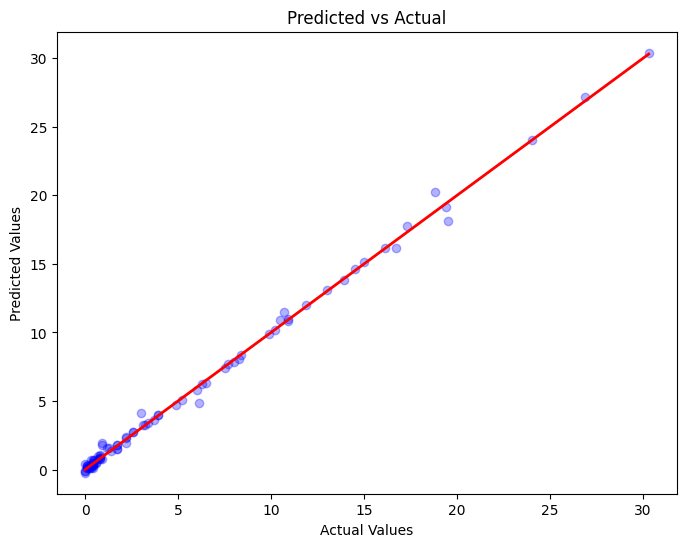

In [42]:
# Assuming `y_test` is the actual values and `y_pred` is the predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.3, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Line of perfect fit
plt.title('Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Observations

This graph supports the findings from the RMSE and MAE metrics, confirming that the polynomial regression model is performing well in predicting outcomes. The visual representation reinforces the numerical results, indicating a strong predictive capability of the model.

## Calculate Additional Metrics (MAE, R²)

In [39]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_poly)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate R² Score
r2 = r2_score(y_test, y_pred_poly)
print(f'R² Score: {r2}')

Mean Absolute Error (MAE): 0.5136339138939653
R² Score: 0.9884419057900964


### Observations

The combination of a low MAE and a high R² score reinforces the effectiveness and robustness of the polynomial regression model. It demonstrates that the model is not only predicting with minimal error but also explaining a significant portion of the variability in the data.

## Residual Analysis

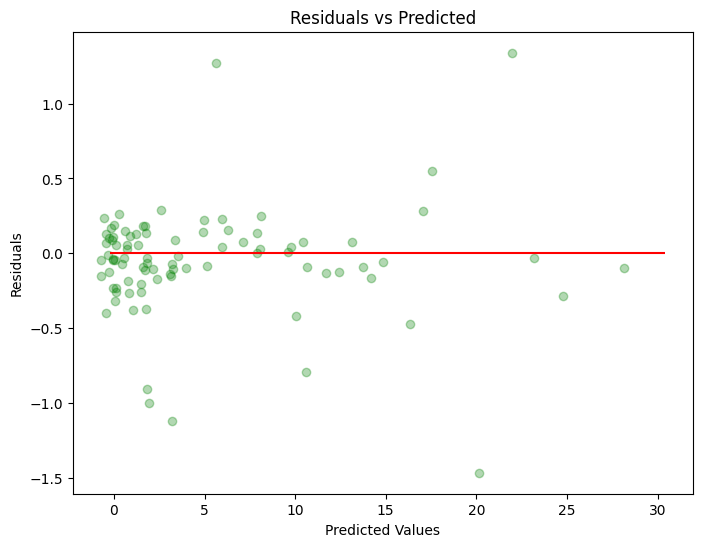

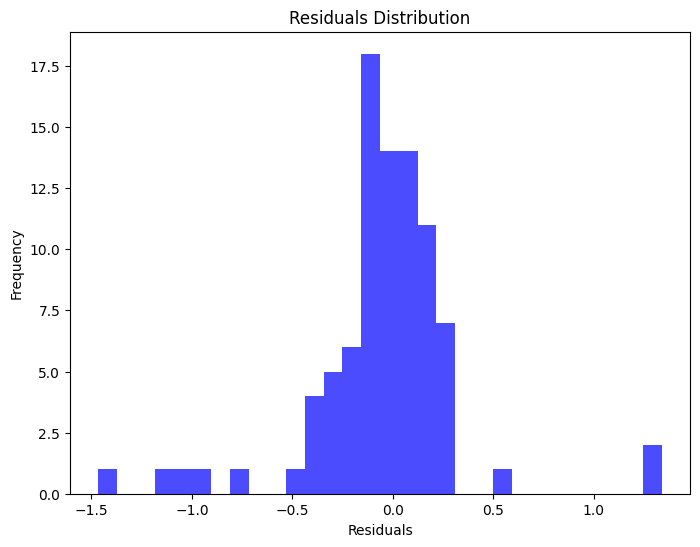

In [43]:
# Calculate residuals
residuals = y_test - y_pred_poly

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.3, color='green')
plt.hlines(y=0, xmin=min(y_pred_poly), xmax=max(y_pred_poly), color='red')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Optionally, check the distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.7)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### Observations

These plots supports the conclusion drawn from the previous metrics (MAE and R² score). The random distribution of residuals implies that the polynomial regression model is reliable and robust for the Algerian forest fire dataset, accurately predicting outcomes without significant bias or variability in error.

## Cross-Validation

In [41]:
from sklearn.model_selection import cross_val_score

# Assuming you have your model and your feature set X and target y
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

print(f'Cross-Validation RMSE Scores: {cv_rmse}')
print(f'Average CV RMSE: {np.mean(cv_rmse)}')

Cross-Validation RMSE Scores: [0.48567881 1.3001522  0.48480593 2.14323017 1.51971244]
Average CV RMSE: 1.186715912879316


### Observations

The cross-validation results indicate that while the polynomial regression model demonstrates solid average performance, the variability in RMSE scores highlights areas for potential improvement. It may be beneficial to explore model refinement, data preprocessing, or feature engineering to enhance stability and ensure consistent performance across all data subsets.

## Final Thoughts

In conclusion, this project demonstrates the importance of model selection, cross-validation, and regularization in building robust predictive models. Further work could include testing additional advanced models, such as decision trees or ensemble techniques, to explore their performance on this dataset.